
# <font color=navy> 중간고사 - 통계분석론 2023-1학기

<font color="blue"> 
    
- **각 문항에 답을 하기 위해 사용된 코드, 그래프, 통계량 등을 반드시 모두 제시하세요.**
- **아래의 문제에 답을 채워넣은 뒤 모든 결과물이 프린트 된 상태에서 `File>Download as>HTML(.html)` 또는 pdf 형식으로 저장하여 업로드하세요.(모든 답안이 제대로 보이는지 반드시 확인!!)**

In [82]:
# import common
import pandas as pd
import numpy as np
from scipy import stats

import seaborn as sns
import matplotlib.pylab as plt
from statsmodels.stats import weightstats
from statsmodels.stats import proportion

#### 1. 한 병원에서 태어난 신생아 몸무게는 정규분포를 따르고 평균이 3.1 kg이고 표준편차는 0.5 kg이다. 
#### (a) 3.6 kg 이상 몸무게의 신생아가 태어날 확률은? 

In [83]:
mean = 3.1
std = 0.5
1- stats.norm.cdf(3.6, mean, std)

0.15865525393145707

#### (b) 90백분위 수에 해당하는 신생아 몸무게는? 즉, 상위 10%에 해당하는 신생아 몸무게는 몇 kg 이상인가? 

In [84]:
stats.norm.ppf(0.9, mean, std)

3.7407757827723005

#### 2. 한 통계학 과목 중간시험 점수는 평균이 78이고 표준편차가 6인 정규분포를 따른다. 
#### (a) 중간시험점수가 75점 미만인 학생의 비율은 얼마인가? 

In [85]:
mean = 78
std = 6
stats.norm.cdf(75, mean, std)

0.3085375387259869

#### (b) 50명으로 구성된 한 반의 평균 중간시험점수가 75점 미만일 확률은 얼마인가? 

In [86]:
n = 50
se = std / np.sqrt(n)
stats.norm.cdf(75, mean, se)

0.0002034760087224789

#### 3. 한 라디오 방송사의 방송 광고 담당자는 광고의 길이가 평균 25초인지 확인하려고 한다. 41개의 광고를 무작위로 선택하여 조사한 결과 평균 26.9초, 표준편차는 7.88초였다. 

#### (a) 평균 광고 길이의 99% 신뢰구간은 무엇인가? 

In [89]:
mean = 26.9
std = 7.88
n = 41
# 표준오차 구하기
se = std / (n ** 0.5)
t_value = stats.t.ppf((1+0.99)/2, n-1)
low = mean - t_value*se
upper = mean + t_value*se

In [90]:
print(f"답은 {low}~{upper}의 범위값을 99% 신뢰수준하에 가집니다")

답은 23.57175924796403~30.228240752035965의 범위값을 99% 신뢰수준하에 가집니다


#### (b) 위의 신뢰구간을 사용하여 광고의 길이가 평균 25초라고 결론지을 수 있는지 확인하시오. 

## 상기 신뢰구간 99%하에서 범위값안에 평균 25가 해당되기 때문에 평균 25초라고 결론지을 수 있습니다

#### 4. 심리학자들은 개인의 위험에 대한 인식을 측정하기 위해 금융과 건강과 관련된 설문조사를 시행하였다. 그 중 새로운 의학연구회사에 저축의 80%를 투자하는 것에 대해 개인이 인식하는 위험과 관련된 데이터가 `risk_med80.csv`에 저장되어 있다. 포함된 변수는 아래와 같다.

| 변수명 | 내용                                                                                                                             |
|:--------|:----------------------------------------------------------------------------------------------------------------------------------|
| subid  | 개인 ID                                                                                                                          |
| risk   | 위험인식도                                                                                                                       |
| ethnic | 인종: 1=Caucasian, 2=African-American, 3=Mexican-American,  4=Taiwanese-American                                                 |
| gender | 성별: 0=Female, 1=Male                                                                                                           |
| age    | 나이                                                                                                                             |
| active | 위험인식 측정을 위해 물어본 설문 항목 (위의 표의 22개 코드)                                                                      |
| wvcat  | 사회에 대한 인식: 0=미분류(unclassifiable), 1=개인주의자(individualist), 2=계급주의자(hierarchicalist), 3=평등주의자(egalitarian) |

In [91]:
import matplotlib.pylab as plt
%matplotlib inline
data_path = "./data/"
risk = pd.read_csv(data_path + 'risk_med80.csv')
 # 초 단위로 변환

#### (a) 새로운 의학연구회사에 저축의 80%를 투자하는 것에 대한 위험 인식도가 성별의 차이가 있는지 검증하려고 한다. 적절한 그래프 및 통계적 가설검정 방법을 사용하여 판단하고 결과를 서술하시오. (귀무가설, 대립가설 명시)

In [25]:
#H0 : 저축의 80%를 투자하는 것에 대한 위험이 인식도가 성별에 따라 차이가 없다
#H1 : 저축의 80%를 투자하는 것에 대한 위험의 인식도가 성별에 따라 차이가 있다.
man = risk[risk.gender == 1]
woman = risk[risk.gender == 0]

In [44]:
man_risk =man.risk
woman_risk = woman.risk

In [48]:
man_risk = man_risk.reset_index(drop=True)
woman_risk = woman_risk.reset_index(drop=True)

In [49]:
man.describe()

,subid,risk,ethnic,gender,age,wvcat
count,220.000000,220.000000,220.000000,220.0,220.000000,220.000000
mean,512.731818,68.504545,2.486364,1.0,29.972727,0.890909
std,313.197424,25.259475,1.156595,0.0,14.353628,1.215166
min,7.000000,0.000000,1.000000,1.0,18.000000,0.000000
25%,210.750000,50.000000,1.000000,1.0,20.000000,0.000000
50%,524.500000,75.000000,2.500000,1.0,23.000000,0.000000
75%,824.250000,90.000000,4.000000,1.0,38.000000,2.000000
max,996.000000,100.000000,4.000000,1.0,82.000000,3.000000


In [50]:
woman.describe()

,subid,risk,ethnic,gender,age,wvcat
count,369.000000,369.00000,369.000000,369.0,369.000000,369.000000
mean,559.666667,66.96477,2.547425,0.0,27.146341,0.734417
std,307.426096,23.30694,1.153233,0.0,13.250523,1.070825
min,3.000000,0.00000,1.000000,0.0,18.000000,0.000000
25%,272.000000,50.00000,1.000000,0.0,19.000000,0.000000
50%,597.000000,70.00000,3.000000,0.0,21.000000,0.000000
75%,841.000000,85.00000,4.000000,0.0,29.000000,2.000000
max,1033.000000,100.00000,4.000000,0.0,89.000000,3.000000


In [51]:
import pandas as pd
new_data = {'man' : man_risk, 'woman' : woman_risk}
new_df = pd.DataFrame(new_data)
new_df

,man,woman
0,40.0,80
1,85.0,10
2,90.0,50
3,90.0,90
4,90.0,90
...,...,...
364,NaN,74
365,NaN,50
366,NaN,70
367,NaN,70


<AxesSubplot:>

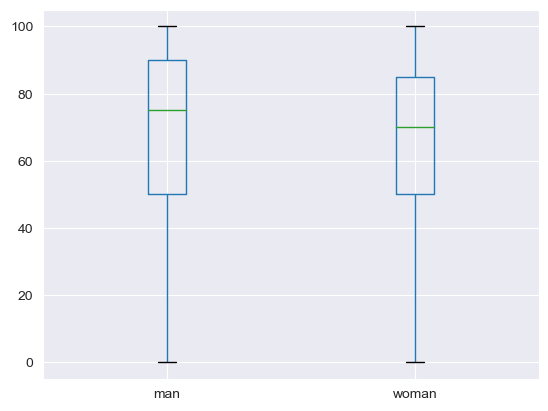

In [52]:
new_df.boxplot()


In [54]:
stats.levene(man_risk,woman_risk)

LeveneResult(statistic=0.13493345520918656, pvalue=0.713503114479991)

In [92]:
from statsmodels.stats import weightstats
weightstats.ttest_ind(man_risk,
                      woman_risk,
                      usevar='pooled',alternative = 'two-sided')

(0.7515158318489347, 0.45264346919231835, 587.0)

### levene's test에 의해 p-value는 0.05보다 높고 이는 유의수준 95%하에서 두 집단이 다르다고 할 수 없습니다. 따라서 H0인 귀무가설을 채택합니다.

#### (b) 사회에 대한 인식(`wvcat`)이 인종별로 차이가 있는가? 적절한 그래프 및 통계적 가설검정 방법을 사용하여 판단하고 결과를 서술하시오.  (귀무가설, 대립가설 명시)

In [94]:
#H0 : 저축의 80%를 투자하는 것에 대한 위험이 인식도가 인종에 따라 차이가 없다
#H1 : 저축의 80%를 투자하는 것에 대한 위험의 인식도가 인종에 따라 차이가 있다.

In [93]:
# import pandas as pd
from scipy.stats import chi2_contingency
wvcat = pd.crosstab(risk.wvcat, risk.ethnic)

result = chi2_contingency(wvcat)
print("Chisq stat: %.10f, p-value: %.10f, df: %i" % (result[0:3]))

#p-value가 0.05보다 작으므로 대립가설H1을 채택한다.

Chisq stat: 70.5329058264, p-value: 0.0000000000, df: 9


In [98]:
Caucasian = risk[risk.wvcat ==1]
African = risk[risk.wvcat == 2]
Mexican = risk[risk.wvcat == 3]
Taiwanese = risk[risk.wvcat == 4]

woman_risk = woman_risk.reset_index(drop=True)
African = Caucasian[]


,subid,risk,ethnic,gender,age,wvcat
0,15,80,1,0,36,2
20,64,90,1,1,60,2
22,72,95,1,1,65,2
32,97,95,1,0,66,2
33,103,50,1,1,35,2
...,...,...,...,...,...,...
561,969,80,4,0,22,2
562,970,100,4,0,20,2
571,980,70,4,0,21,2
577,994,35,4,0,21,2


#### 5. 한 투자상담사는 개인투자자들이 저축의 80%를 투자하는데 있어서 우량주보다 새로운 의학연구회사에 투자하는 것을 더 위험하다고 느낀다고 주장하였다. 이 주장에 대해 적절한 그래프 및 통계적 가설검정 방법을 사용하여 판단하고 결과를 서술하시오. (귀무가설, 대립가설 명시)

####  `risk_med80_stk80.csv`는 각 개인이 우량주(`risk_stk80`)와 새로운 의학연구회사(`risk_med80`)에 80%를 투자하는 것에 대해 인식하는 위험을 함께 포함하고 있다.

In [56]:
import matplotlib.pylab as plt
%matplotlib inline
data_path = "./data/"
risk_2 = pd.read_csv(data_path + 'risk_med80_stk80.csv')
 # 초 단위로 변환

In [57]:
risk_2

,subid,risk_med80,risk_stk80
0,15,80,60
1,17,10,40
2,19,40,10
3,23,85,75
4,27,90,10
...,...,...,...
561,1007,74,80
562,1009,50,50
563,1010,70,65
564,1016,70,60


In [ ]:
#H0 : 저축의 80%를 투자하는데 우량주보다 새로운 의학연구회사에 투자하는 것이 더 위험하지 않다
# H1 : 저축의 80%를 투자하는데 우량주보다 새로운 의학연구회사에 투자하는 것이 더 위험하다.

In [63]:
stk = risk_2.risk_stk80
med = risk_2.risk_med80

In [65]:
stk.describe()

count    566.000000
mean      61.395760
std       25.998548
min        0.000000
25%       48.250000
50%       65.000000
75%       80.000000
max      100.000000
Name: risk_stk80, dtype: float64

In [66]:
med.describe()

count    566.000000
mean      67.554770
std       24.146155
min        0.000000
25%       50.000000
50%       75.000000
75%       89.000000
max      100.000000
Name: risk_med80, dtype: float64

In [67]:
new_data = {'stk' : stk, 'med' : med}
new_df = pd.DataFrame(new_data)
new_df

,stk,med
0,60,80
1,40,10
2,10,40
3,75,85
4,10,90
...,...,...
561,80,74
562,50,50
563,65,70
564,60,70


<AxesSubplot:>

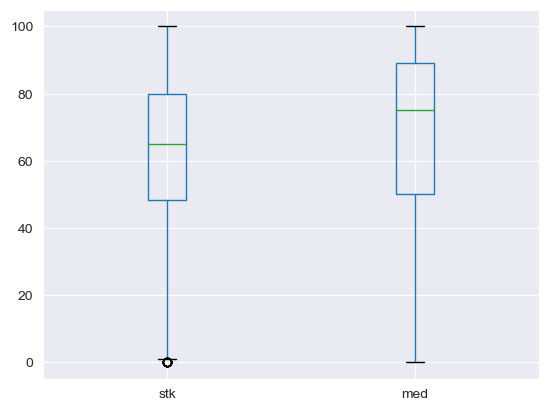

In [68]:
new_df.boxplot()

In [69]:
stats.levene(med,stk)

LeveneResult(statistic=4.9315879319507845, pvalue=0.026567781768165835)

In [70]:
from statsmodels.stats import weightstats
stats_med = weightstats.DescrStatsW(new_df.med)
stats_stk = weightstats.DescrStatsW(new_df.stk)

In [71]:
stats_med.tconfint_mean()

(65.5612567718243, 69.54828386421809)

In [73]:
stats_stk.tconfint_mean()

(59.249312075863564, 63.54220735876542)

In [95]:
# t_result = stats_stk.ttest_mean(stats_med.mean, alternative= "larger")
# t_result

(-5.6359881173313156, 0.9999999862499919, 565.0)

In [97]:
# from statsmodels.stats import weightstats
weightstats.ttest_ind(risk_2['risk_med80'], risk_2['risk_stk80'],
                      usevar='unequal',alternative = 'larger')

# p-value가 1.9511028790470987e-05으로 0.05보다 작으므로 귀무가설을 기각하고 대립가설을 채택한다

(4.129647396886732, 1.9511028790471065e-05, 1123.881960296998)